In [ ]:
# xrdcp root://cmsxrootd.fnal.gov//store/mc/RunIISummer20UL18NanoAODv9/DYJetsToLL_M-50_TuneCP5_13TeV-madgraphMLM-pythia8/NANOAODSIM/106X_upgrade2018_realistic_v16_L1v1-v1/280000/525CD279-3344-6043-98B9-2EA8A96623E4.root

In [8]:
import uproot
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import mplhep

mplhep.style.use(mplhep.style.CMS)

In [2]:
dy_files = "525CD279-3344-6043-98B9-2EA8A96623E4.root"

file = uproot.open(dy_files)
dict(file)

{'tag;1': <TObjString 'untagged' at 0x7fc18c8b4970>,
 'Events;1': <TTree 'Events' (1628 branches) at 0x7fc1bc19f3d0>,
 'LuminosityBlocks;1': <TTree 'LuminosityBlocks' (2 branches) at 0x7fc1bc19fa30>,
 'Runs;1': <TTree 'Runs' (8 branches) at 0x7fc1bc19fbe0>,
 'MetaData;1': <TTree 'MetaData' (1 branches) at 0x7fc16b69d6d0>,
 'ParameterSets;1': <TTree 'ParameterSets' (1 branches) at 0x7fc1bc19f4c0>}

In [3]:
tree = file['Events']
tree.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
run                  | uint32_t                 | AsDtype('>u4')
luminosityBlock      | uint32_t                 | AsDtype('>u4')
event                | uint64_t                 | AsDtype('>u8')
HTXS_Higgs_pt        | float                    | AsDtype('>f4')
HTXS_Higgs_y         | float                    | AsDtype('>f4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_1_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_cat... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype('>i4')
HTXS_stage1_2_fin... | int32_t                  | AsDtype(

In [4]:
dyevents = NanoEventsFactory.from_root(file).events()
dyevents.Muon.fields

['dxy',
 'dxyErr',
 'dxybs',
 'dz',
 'dzErr',
 'eta',
 'ip3d',
 'jetPtRelv2',
 'jetRelIso',
 'mass',
 'miniPFRelIso_all',
 'miniPFRelIso_chg',
 'pfRelIso03_all',
 'pfRelIso03_chg',
 'pfRelIso04_all',
 'phi',
 'pt',
 'ptErr',
 'segmentComp',
 'sip3d',
 'softMva',
 'tkRelIso',
 'tunepRelPt',
 'mvaLowPt',
 'mvaTTH',
 'charge',
 'jetIdx',
 'nStations',
 'nTrackerLayers',
 'pdgId',
 'tightCharge',
 'fsrPhotonIdx',
 'highPtId',
 'highPurity',
 'inTimeMuon',
 'isGlobal',
 'isPFcand',
 'isStandalone',
 'isTracker',
 'jetNDauCharged',
 'looseId',
 'mediumId',
 'mediumPromptId',
 'miniIsoId',
 'multiIsoId',
 'mvaId',
 'mvaLowPtId',
 'pfIsoId',
 'puppiIsoId',
 'softId',
 'softMvaId',
 'tightId',
 'tkIsoId',
 'triggerIdLoose',
 'genPartIdx',
 'genPartFlav',
 'cleanmask',
 'fsrPhotonIdxG',
 'genPartIdxG',
 'jetIdxG']

In [5]:
df_ = ak.to_pandas(dyevents.Muon)
df_

dxy    dxyErr     dxybs        dz     dzErr       eta  \
entry subentry                                                               
0     0        -0.000912  0.001450  0.000018  0.002848  0.002930  0.631714   
      1        -0.001462  0.001541 -0.002411  0.000305  0.006714  0.083466   
3     0        -0.000483  0.002106  0.000666  0.018936  0.014282 -2.144531   
      1         0.000443  0.002045 -0.000677  0.002310  0.006714 -1.906006   
5     0         0.000251  0.001801  0.000571  0.007912  0.006836 -2.165039   
...                  ...       ...       ...       ...       ...       ...   
94212 1        -0.000066  0.000992 -0.000108 -0.000445  0.003082  1.045654   
94213 0         0.000156  0.001190 -0.000345  0.002104  0.002686  0.590210   
      1         0.000721  0.001328  0.001126 -0.000076  0.003754 -1.282715   
94214 0        -0.000606  0.001801 -0.000949 -0.003223  0.003326  0.369812   
94216 0         0.000484  0.001465 -0.000596 -0.001421  0.003052 -1.130371   

                    ip3d  jetPtRelv2  jetRelIso      mass  ...  softMvaId  \
entry subentry                                             ...              
0     0         0.002531   23.500000   0.020142  0.105713  ...       True   
      1         0.001493    8.781250   0.054565  0.105713  ...      False   
3     0         0.004402    9.187500   0.178223  0.105713  ...       True   
      1         0.000805    2.687500   0.145508  0.105713  ...       True   
5     0         0.001810    7.343750   0.051758  0.105713  ...      False   
...                  ...         ...        ...       ...  ...        ...   
94212 1         0.000286    2.500000  -0.021179  0.105713  ...       True   
94213 0         0.001791   13.625000  -0.036865  0.105713  ...       True   
      1         0.000722   12.031250   0.047607  0.105713  ...       True   
94214 0         0.003077    2.492188   1.773438  0.105713  ...       True   
94216 0         0.000962   16.312500   0.018372  0.105713  ...      False   

                tightId  tkIsoId  triggerIdLoose  genPartIdx  genPartFlav  \
entry subentry                                                              
0     0            True        2            True           8            1   
      1            True        2            True           7            1   
3     0            True        2            True           7            1   
      1            True        2            True           6            1   
5     0            True        2            True          13            1   
...                 ...      ...             ...         ...          ...   
94212 1            True        2            True           8            1   
94213 0            True        2            True          10            1   
      1            True        2            True           8            1   
94214 0            True        0            True          10            1   
94216 0            True        2            True           9            1   

                cleanmask  fsrPhotonIdxG  genPartIdxG  jetIdxG  
entry subentry                                                  
0     0                 1             -1            8        0  
      1                 1             -1            7        1  
3     0                 1             -1           65       10  
      1                 1             -1           64       11  
5     0                 1             -1           93       18  
...                   ...            ...          ...      ...  
94212 1                 1             -1      2152531   380657  
94213 0                 1             -1      2152548   380662  
      1                 1             -1      2152546   380661  
94214 0                 1             -1      2152563   380665  
94216 0                 1             -1      2152608   380672  

[62479 rows x 60 columns]

In [31]:
zmucands = ak.combinations(dyevents.Muon, 2, fields=["tag", "probe"])

zmucands = zmucands[
    (zmucands.tag.pt > 10)
    & (abs(zmucands.tag.eta) < 2.5)
    & (zmucands.tag.pfRelIso03_chg < 0.2)
    & (zmucands.probe.pt > 5)
    & (abs(zmucands.probe.eta) < 2.5)
    & (zmucands.probe.pfRelIso03_chg < 0.1)
]

zmucands = zmucands[ak.num(zmucands) > 0]

zmucands = ak.firsts(zmucands)

zmumass = (zmucands.tag + zmucands.probe).mass

zmugoodprobe = zmucands.probe.tightId

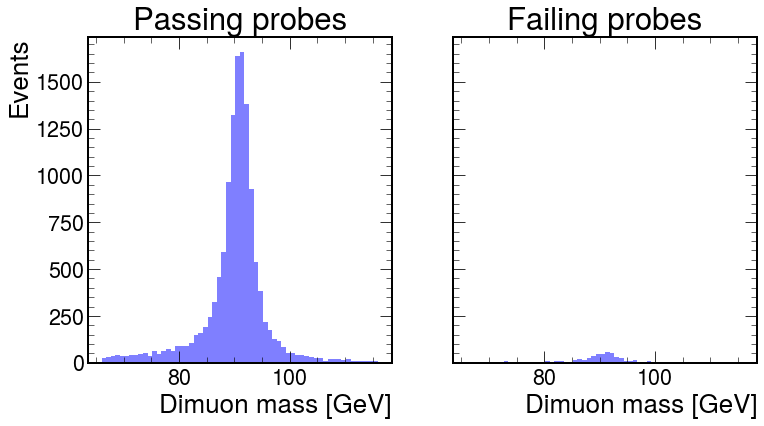

In [81]:
fig, (axp, axf) = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
mbins = np.linspace(66, 116, 61)

axp.hist(zmumass[zmugoodprobe], bins=mbins, color='blue', alpha=0.5)
axp.set_title('Passing probes')
axp.set_ylabel('Events')
axp.set_xlabel('Dimuon mass [GeV]')

axf.hist(zmumass[~zmugoodprobe], bins=mbins, color='blue', alpha=0.5)
axf.set_title('Failing probes')
axf.set_xlabel('Dimuon mass [GeV]')

plt.savefig('Dimuon_mass.pdf')

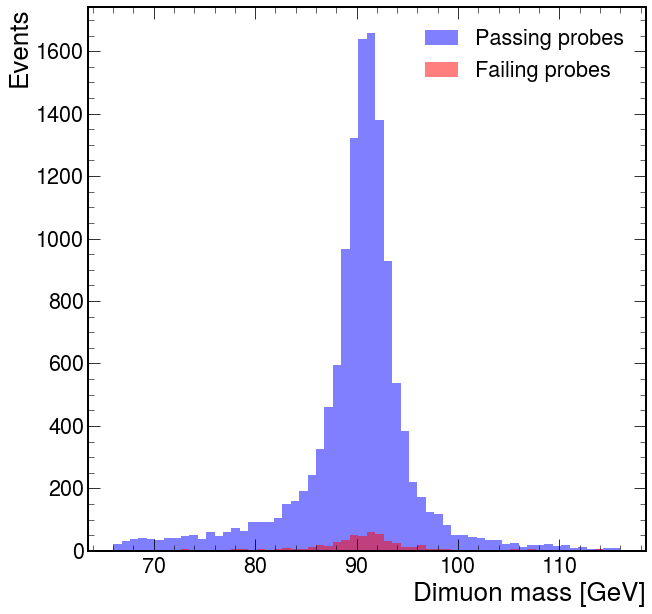

In [85]:
fig, ax = plt.subplots()
mbins = np.linspace(66, 116, 61)

ax.hist(zmumass[zmugoodprobe], bins=mbins, label='Passing probes', color='blue', alpha=0.5)
ax.hist(zmumass[~zmugoodprobe], bins=mbins, label='Failing probes', color='red', alpha=0.5)

ax.set_ylabel('Events')
ax.set_xlabel('Dimuon mass [GeV]')
ax.legend()
plt.savefig("Dimuon_mass.pdf")

In [83]:
num_passprobe = len(zmumass[zmugoodprobe])
all_probe = len(zmumass)

efficiency = num_passprobe/all_probe * 100

print(f'number of passprobe events = {num_passprobe}')
print(f'number of probe events = {all_probe}')
print(f'efficiency = {efficiency}')

number of passprobe events = 15072
number of probe events = 16335
efficiency = 92.26813590449953


In [84]:
yhist, binedges = np.histogram(zmumass[zmugoodprobe], bins=mbins)
bincenters = np.mean(np.vstack([binedges[0:-1],binedges[1:]]), axis=0)
bincenters[np.argmax(yhist)]

91.41666666666667

## Addition (ground truth)

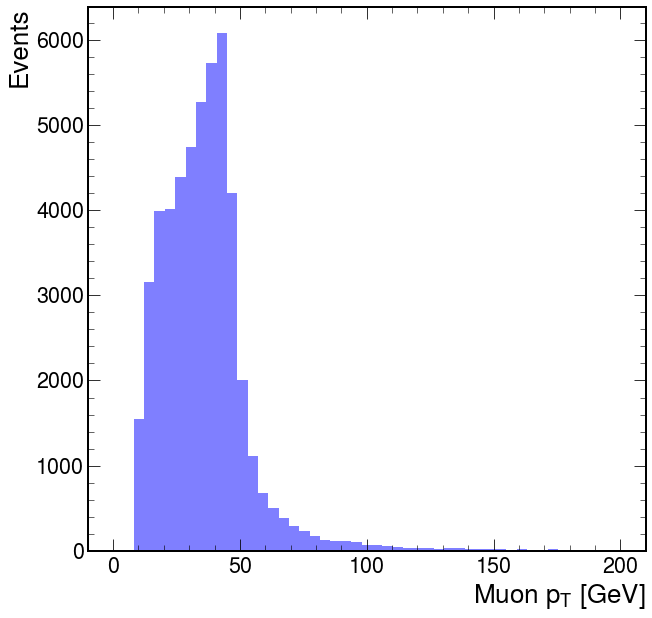

In [9]:
kinematic_cut = (dyevents.Muon.pt > 10) & (abs(dyevents.Muon.eta) < 2.5)

fig, ax = plt.subplots()
ax.set_xlabel(r'Muon $p_{T}$ [GeV]')
ax.set_ylabel(r'Events')
ax.hist(ak.flatten(dyevents.Muon.pt[kinematic_cut]), bins=np.linspace(0, 200, 50), color='blue', alpha=0.5)
plt.savefig('Muon_pt.pdf')

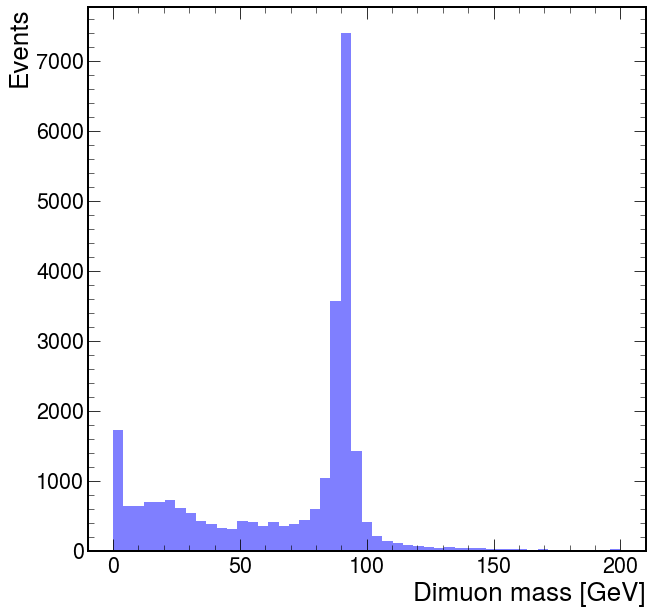

In [10]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Dimuon mass [GeV]')
ax.set_ylabel(r'Events')

pairs = ak.combinations(dyevents.Muon, 2, fields=["mu1", "mu2"])
mass = (pairs.mu1 + pairs.mu2).mass
ax.hist(ak.flatten(mass), bins=np.linspace(0, 200, 50), color='blue', alpha=0.5)
plt.savefig('Dimuon_mass_GT.pdf')

In [11]:
muons = ak.flatten(dyevents.Muon[kinematic_cut])

true_muons = muons[ak.fill_none(abs(muons.matched_gen.pdgId) == 13, False)]
unmatched_muons = muons[ak.is_none(muons.matched_gen)]

In [12]:
df = ak.to_pandas(
    ak.zip(
        {
            "parentId": abs(true_muons.matched_gen.distinctParent.pdgId),
            "fromHardProcess": true_muons.matched_gen.hasFlags(["fromHardProcess"]),
            "isPrompt": true_muons.matched_gen.hasFlags(["isPrompt"]),
            "isDirectPromptTauDecayProduct": true_muons.matched_gen.hasFlags(
            ["isDirectPromptTauDecayProduct"]),
        }
    )
)

top10 = (
    df.groupby(list(df.columns))
    .size()
    .rename("count")
    .reset_index()
    .sort_values("count", ascending=False)
)[:10]

top10

,parentId,fromHardProcess,isPrompt,isDirectPromptTauDecayProduct,count
9,23,True,True,False,39306
6,15,False,False,True,3826
1,2,True,True,False,1202
0,1,True,True,False,358
3,4,True,True,False,258
7,21,True,True,False,187
2,3,True,True,False,135
4,5,True,True,False,40
11,411,False,False,False,22
15,511,False,False,False,17


In [13]:
promptmatch = true_muons.matched_gen.hasFlags(['isPrompt'])
promptmatch = promptmatch | true_muons.matched_gen.hasFlags(['isDirectPromptTauDecayProduct'])
prompt_muons = true_muons[promptmatch]
nonprompt_muons = true_muons[~promptmatch]

In [42]:
dyevents.Muon.genPartFlav.__doc__

'Flavour of genParticle for MC matching to status==1 muons: 1 = prompt muon (including gamma*->mu mu), 15 = muon from prompt tau, 5 = muon from b, 4 = muon from c, 3 = muon from light or unknown, 0 = unmatched'

In [43]:
flavors, counts = np.unique(ak.to_numpy(prompt_muons.genPartFlav), return_counts=True)
for flavor, count in zip(flavors, counts):
    print("GenPart flavor % 3d has % 8d occurrences" % (flavor, count))

GenPart flavor   1 has    41494 occurrences
GenPart flavor  15 has     3826 occurrences


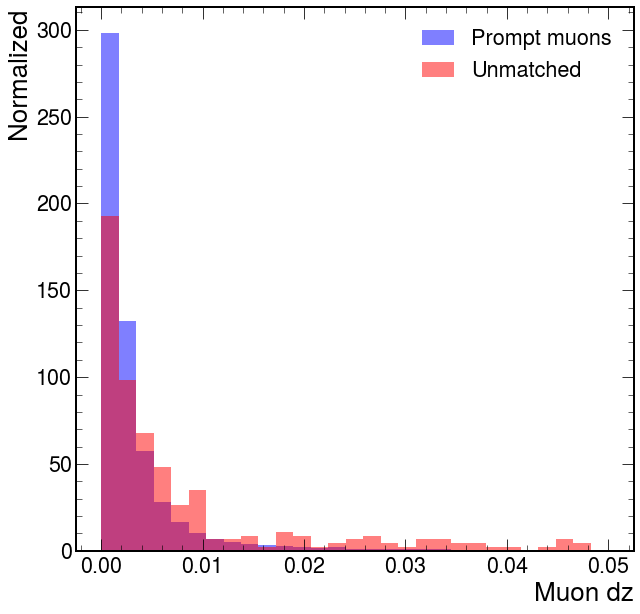

In [14]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Muon dz')
common_opts = {
    'alpha': 0.5,
    'bins': np.linspace(0, 0.05, 30),
    'density': True,
}

def cut(candidates):
    return candidates[
        (candidates.pt > 10)
    ]

ax.hist(cut(prompt_muons).dz, color='blue', label='Prompt muons', **common_opts)
ax.hist(cut(unmatched_muons).dz, color='red', label='Unmatched', **common_opts)

ax.legend()
ax.set_ylabel('Normalized' if common_opts['density'] else 'Events')
plt.savefig('Muon_dz.pdf')

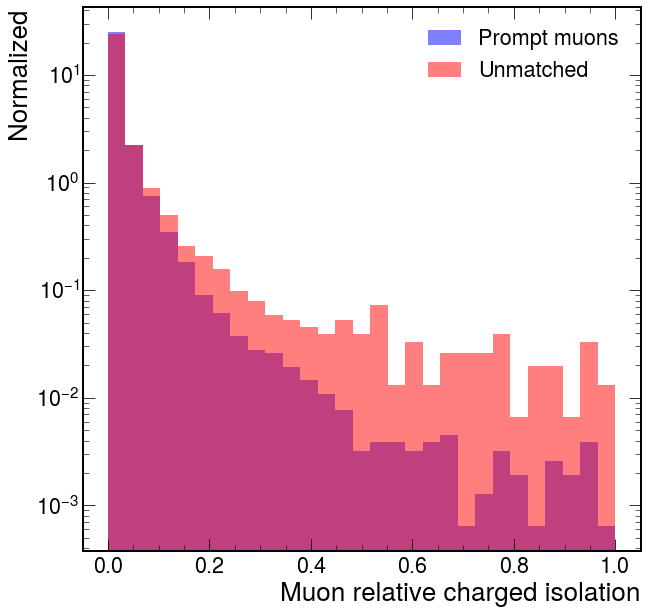

In [15]:
fig, ax = plt.subplots()
ax.set_xlabel(r'Muon relative charged isolation')
common_opts = {
    'alpha': 0.5,
    'bins': np.linspace(0, 1, 30),
    'density': True,
}

ax.hist(prompt_muons.pfRelIso03_chg, color='blue', label='Prompt muons', **common_opts)
ax.hist(unmatched_muons.pfRelIso03_chg, color='red', label='Unmatched', **common_opts)

ax.legend()
ax.set_yscale('log')
ax.set_ylabel('Normalized' if common_opts['density'] else 'Events')
plt.savefig('prompt_muons.pdf')

In [19]:
def makeroc(sig, bkg, binning, direction=1):
    sighist, _ = np.histogram(ak.to_numpy(sig), bins=binning)
    bkghist, _ = np.histogram(ak.to_numpy(bkg), bins=binning)

    if direction == 1:
        sighist[0] += sum(sig < binning[0])
        bkghist[0] += sum(bkg < binning[0])
    elif direction == -1:
        sighist[-1] += sum(sig > binning[-1])
        bkghist[-1] += sum(bkg > binning[-1])
    else:
        raise ValueError("Invalid direction")
    sigpass = (np.cumsum(sighist[::direction]) / len(sig))[::direction]
    bkgpass = (np.cumsum(bkghist[::direction]) / len(bkg))[::direction]
    return (sigpass, bkgpass)


def cut(muons):
    return muons[
        (muons.pt > 20)
        & (abs(muons.eta) < 2.47)
    ]


roc_mva = makeroc(
    sig=cut(prompt_muons).mvaTTH,
    bkg=cut(unmatched_muons).mvaTTH,
    binning=np.linspace(-1, 1., 50),
    direction=-1,
)

In [20]:
sig_pass = cut(prompt_muons).looseId
bkg_pass = cut(unmatched_muons).looseId
wp_cutbased_loose = (
    sum(sig_pass) / len(sig_pass),
    sum(bkg_pass) / len(bkg_pass),
)

sig_pass = cut(prompt_muons).tightId
bkg_pass = cut(unmatched_muons).tightId
wp_cutbased_tight = (
    sum(sig_pass) / len(sig_pass),
    sum(bkg_pass) / len(bkg_pass),
)

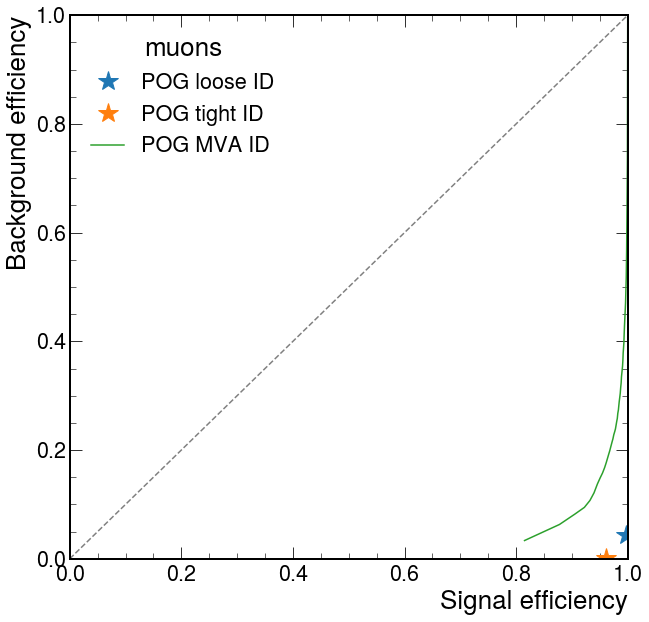

In [21]:
fig, ax = plt.subplots()
ax.plot(*wp_cutbased_loose, label=r"POG loose ID", marker='*', markersize=20, linestyle='none')
ax.plot(*wp_cutbased_tight, label=r"POG tight ID", marker='*', markersize=20, linestyle='none')
ax.plot(*roc_mva, label=r"POG MVA ID")

diag = np.linspace(0, 1, 100)
ax.plot(diag, diag, color='grey', linestyle='--')
ax.set_xlabel("Signal efficiency")
ax.set_ylabel("Background efficiency")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.legend(title=r'muons')
plt.savefig('Muons_efficiency.pdf')